In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xgcm
import xarray as xr
import sectionate
import regionate
import matplotlib.pyplot as plt

# Application to a global CM4 simulation

This notebook just provides another global example that focuses on the tropical oceans, to complement the previous Arctic-focused example.

## 0. Load CM4 data from local GFDL path

In [3]:
from load_example_model_grid_gfdl import load_CM4p25
grid = load_CM4p25()
ds = grid._ds

/work5/hfd/codedev/regionate/examples/load_example_model_grid_gfdl.py:16: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(f"{diag_path}/{realm}_{frequency}_{suffix}/ts/{frequency}/10yr/*.0341*.nc", chunks={'time':1}, decode_times=False).isel(time=[0])
/work5/hfd/codedev/regionate/examples/load_example_model_grid_gfdl.py:16: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(f"{diag_path}/{realm}_{frequency}_{suffix}/ts/{frequency}/10yr/*.0341*.nc", chunks={'time':1}, decode_times=False).isel(time=[0])
/work5/hfd/codedev/regionate/examples/load_example_model_grid_gfdl.py:16: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. T

In [4]:
dheatdt_dynamics = (ds['T_advection_xy']*ds['areacello']).sum('z_l')
dheatdt_dynamics = dheatdt_dynamics.where(dheatdt_dynamics!=0.)

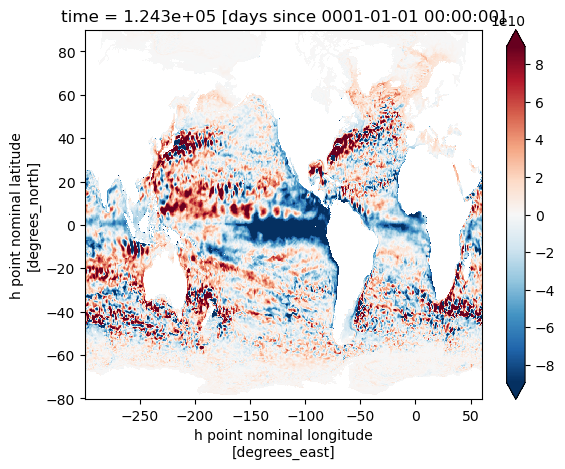

In [5]:
dheatdt_dynamics.isel(time=0).plot(robust=True)

## 1. Define a mask

In [6]:
T_threshold = 29
ds['mask'] = ds['thetao'].isel(z_l=0, time=0) > T_threshold

## 2. Convert the mask into a `regionate.Regions` class instance

In [7]:
from regionate import MaskRegions
region_dict = MaskRegions(ds.mask, grid).region_dict

## 3. Visualize the mask and its boundary

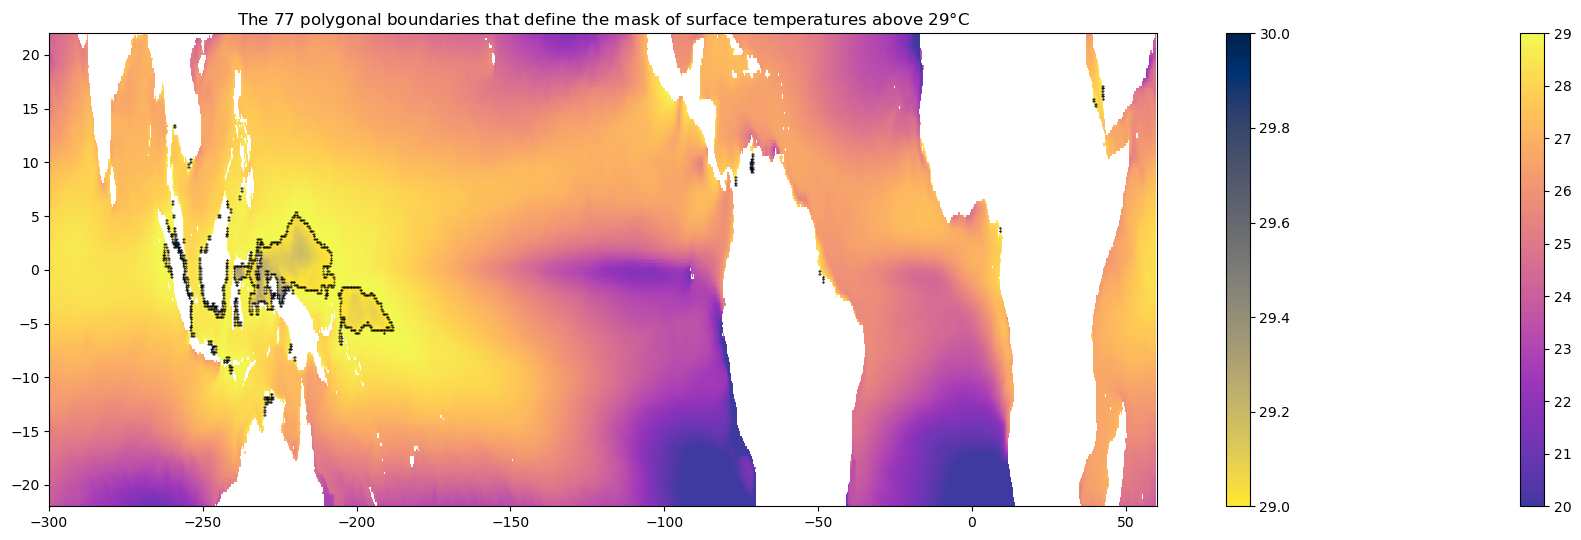

In [8]:
plt.figure(figsize=(18, 5.5))
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(~ds.mask),
    alpha=0.8,
    cmap="plasma",
    vmin=20, vmax=T_threshold,
)
plt.colorbar()
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(ds.mask),
    cmap="cividis_r",
    vmin=T_threshold, vmax=30.
)
plt.colorbar()
for region in region_dict.values():
    plt.plot(region.lons, region.lats, "k.", markersize=0.75, linewidth=0.5)
plt.ylim(-22, 22);
plt.title(rf"The {len(region_dict)} polygonal boundaries that define the mask of surface temperatures above {T_threshold}$\degree$C");
plt.tight_layout()

# Another Example

For a lower temperature treshold with a spatial extent that spans all latitudes and crosses the model's periodic X-boundary.

In [9]:
from load_example_model_grid_gfdl import load_CM4p25
grid = load_CM4p25()
ds = grid._ds

/work5/hfd/codedev/regionate/examples/load_example_model_grid_gfdl.py:16: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(f"{diag_path}/{realm}_{frequency}_{suffix}/ts/{frequency}/10yr/*.0341*.nc", chunks={'time':1}, decode_times=False).isel(time=[0])
/work5/hfd/codedev/regionate/examples/load_example_model_grid_gfdl.py:16: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(f"{diag_path}/{realm}_{frequency}_{suffix}/ts/{frequency}/10yr/*.0341*.nc", chunks={'time':1}, decode_times=False).isel(time=[0])
/work5/hfd/codedev/regionate/examples/load_example_model_grid_gfdl.py:16: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. T

In [10]:
T_threshold = 25
ds['mask'] = ds['thetao'].isel(z_l=0, time=0) > T_threshold

In [11]:
from regionate import MaskRegions
region_dict = MaskRegions(ds.mask, grid).region_dict

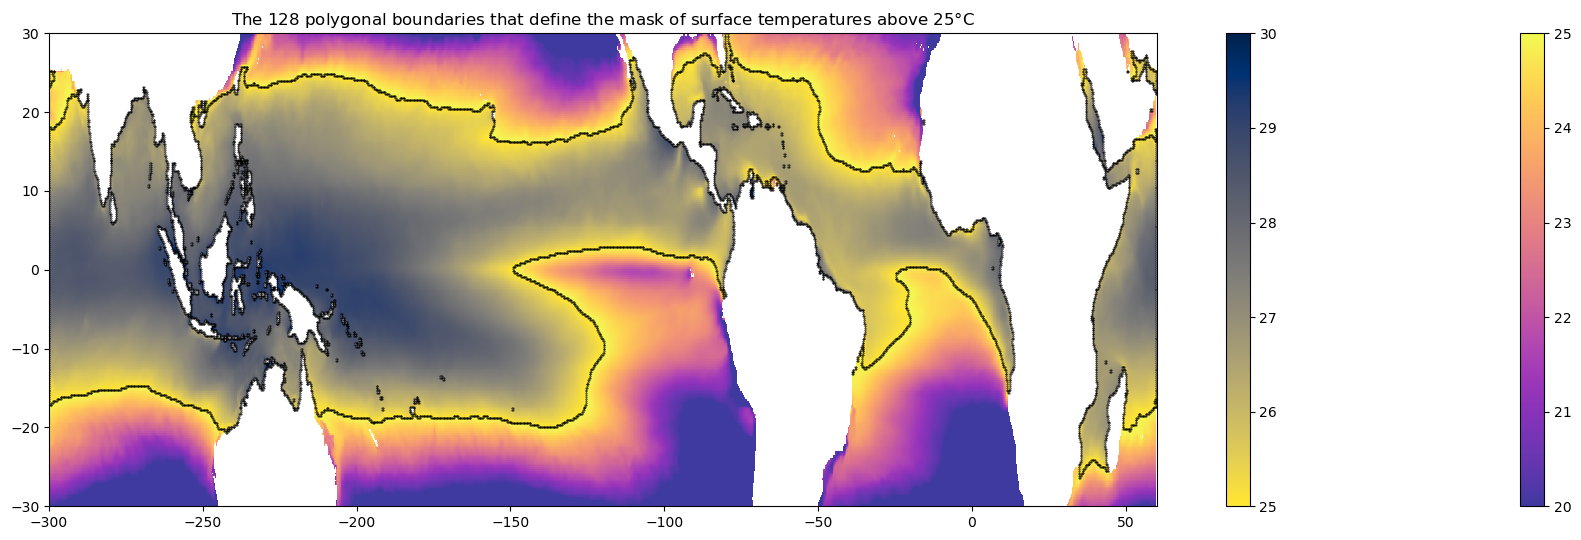

In [12]:
plt.figure(figsize=(18, 5.5))
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(~ds.mask),
    alpha=0.8,
    cmap="plasma",
    vmin=20, vmax=T_threshold,
)
plt.colorbar()
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(ds.mask),
    cmap="cividis_r",
    vmin=T_threshold, vmax=30.
)
plt.colorbar()
for region in region_dict.values():
    plt.plot(region.lons, region.lats, "k.", markersize=0.75, linewidth=0.5)
plt.ylim(-30, 30);
plt.title(rf"""The {len(region_dict)} polygonal boundaries that define the mask of surface temperatures above {T_threshold}$\degree$C""");
plt.tight_layout()